In [52]:
import pandas as pd
import numpy as np
import os
import seaborn as sb
import matplotlib.pyplot as plt

In [19]:
path='C:/Python/Titanic/'

In [20]:
test=os.path.join(path,'training.csv')
test

'C:/Python/Titanic/training.csv'

In [22]:
df=pd.read_csv(os.path.join(path,'train.csv'))

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.shape

(891, 12)

In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

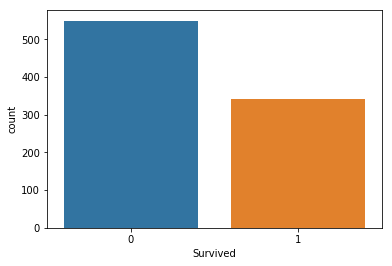

In [29]:
sb.countplot(df.Survived)

In [31]:
df.groupby(['Sex','Survived']).Survived.count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

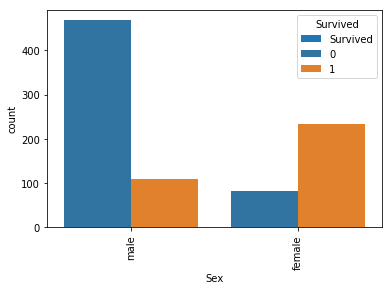

In [36]:
df[['Sex','Survived']].groupby('Sex').mean().plot.bar()
sb.countplot('Sex',hue='Survived',data=df)

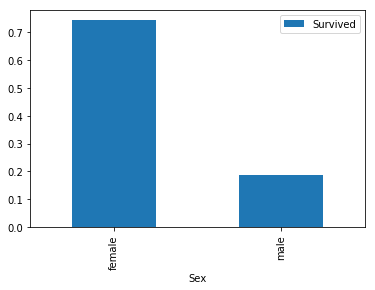

In [37]:
df[['Sex','Survived']].groupby('Sex').mean().plot.bar()

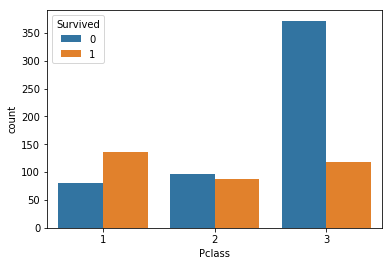

In [38]:
sb.countplot('Pclass',hue='Survived',data=df)

In [41]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap="PuBu")

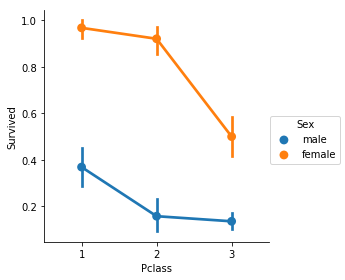

In [43]:
sb.factorplot('Pclass','Survived',hue='Sex',data=df)

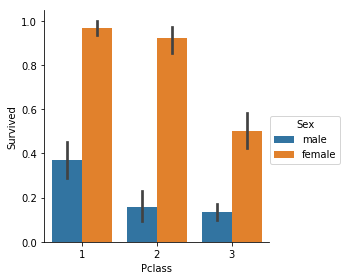

In [45]:
sb.factorplot('Pclass','Survived',data=df, hue='Sex',kind='bar')

In [ ]:
df.Age.max()

In [48]:
print('Average Age is:',df.Age.mean())

Average Age is: 29.69911764705882


In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


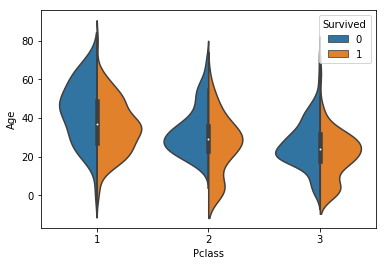

In [64]:
sb.violinplot('Pclass', 'Age',hue='Survived',data=df,split=True)

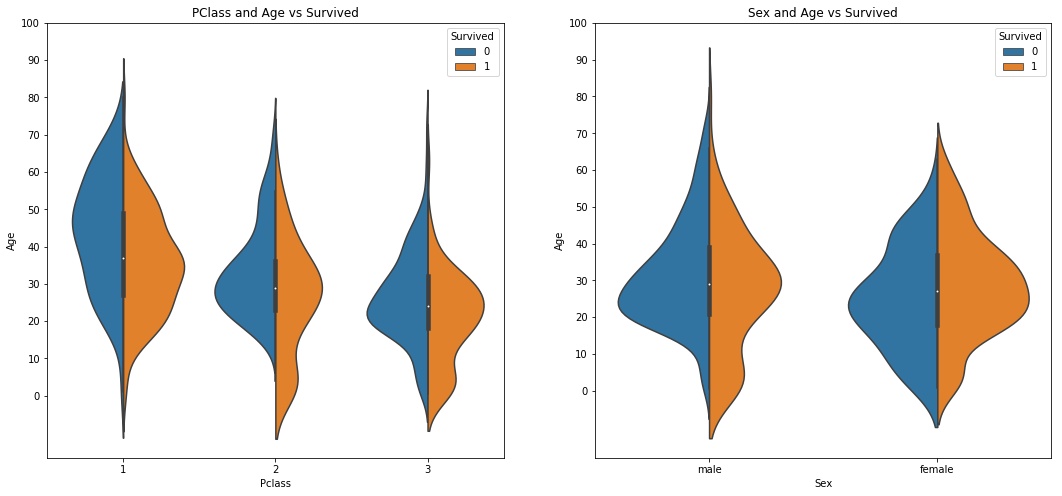

In [67]:

f,ax=plt.subplots(1,2,figsize=(18,8))
sb.violinplot('Pclass', 'Age',hue='Survived',data=df,split=True, ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sb.violinplot("Sex","Age", hue="Survived", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [68]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') 

In [76]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [77]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [78]:
df.groupby('Initial').Age.mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [83]:
df.loc[(df.Age.isnull())&(df.Initial=="Master"),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial=="Miss"), 'Age']=22
df.loc[(df.Age.isnull()) & (df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull()) & (df.Initial=='Mrs'),'Age']=36

df.loc[(df.Age.isnull()) & (df.Initial=='Other'),'Age']=46

In [84]:
df.Age.isnull().sum()f

0

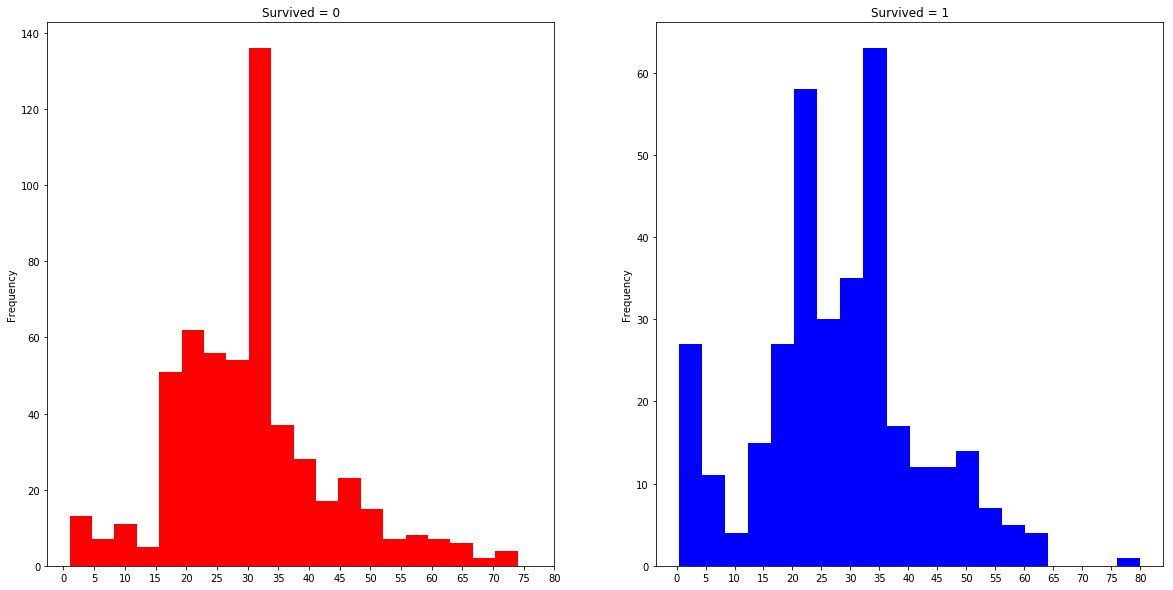

In [109]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df.Survived==0].Age.plot.hist(ax=ax[0],bins=20,color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df.Survived==1].Age.plot.hist(ax=ax[1],bins=20,color='blue')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()


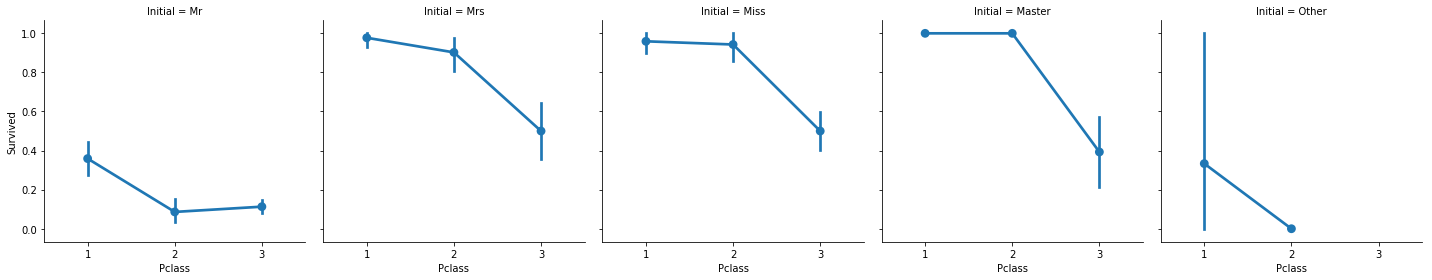

In [111]:
sb.factorplot('Pclass','Survived',col='Initial',data=df)

In [101]:
%matplotlib inline

In [113]:
pd.crosstab(df.SibSp, df.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


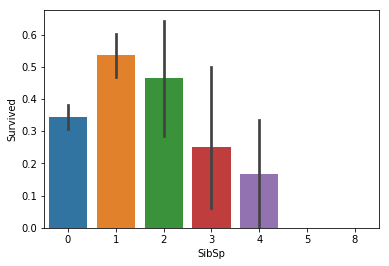

In [116]:
sb.barplot(df.SibSp,df.Survived)

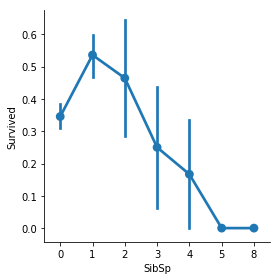

In [118]:
sb.factorplot('SibSp','Survived', data=df)

In [122]:
pd.crosstab(df.SibSp, df.Pclass)

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7
